## OFFSIDES Side Effect Drug-Set Library
### Drug-set labels: Side Effects
#### ALL DATABASES ACCESSED 11/2019
##### Author : Eryk Kropiwnicki | eryk.kropiwnicki@icahn.mssm.edu

In [1]:
import os 
import pandas as pd
from collections import defaultdict

In [2]:
os.chdir('../../scripts')
from export_script import *
os.chdir('../notebooks/PharmGKB')

In [3]:
df_data = pd.read_csv('input/offsides.tsv', sep = '\t')
df_data['event'] = df_data['event'].str.lower()

In [4]:
df_data['pubchem_id'] = df_data['stitch_id'].apply(lambda x : int(x[4:]))

In [5]:
df_data.head()

,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect,pubchem_id
0,CID000000076,dehydroepiandrosterone,C0000737,abdominal pain,2.250000,1.169925,6.537095,6.156712e-07,9,4.000000,0.002849,0,0,0,76
1,CID000000076,dehydroepiandrosterone,C0001622,hyperadrenalism,11.000000,3.459432,4.782699,1.644408e-03,2,0.181818,0.000041,0,0,0,76
2,CID000000076,dehydroepiandrosterone,C0001623,adrenal insufficiency,2.200000,1.137504,4.315199,9.884952e-03,2,0.909091,0.002491,0,0,0,76
3,CID000000076,dehydroepiandrosterone,C0002792,anaphylactic reaction,2.588235,1.371969,4.590918,3.355380e-03,4,1.545455,0.000503,0,0,0,76
4,CID000000076,dehydroepiandrosterone,C0002940,aneurysm,7.333333,2.874469,4.598374,3.399457e-03,2,0.272727,0.000135,0,0,0,76


### Mapping STITCH IDs to Drugbank IDs

In [6]:
drugbank_mapping = pd.read_csv('../../metadata/mapping_files/pubchem.tsv', sep = '\t')
drugbank_mapping.head()

,drugbank_id,pubchem_id,inchi_key
0,DB00006,101041682,OIRCOABEOLEUMC-GEJPAHFPSA-N
1,DB00006,126480209,OIRCOABEOLEUMC-GEJPAHFPSA-N
2,DB00006,132229728,OIRCOABEOLEUMC-GEJPAHFPSA-N
3,DB00006,134827539,OIRCOABEOLEUMC-GEJPAHFPSA-N
4,DB00006,137167482,OIRCOABEOLEUMC-GEJPAHFPSA-N


In [7]:
# Merge the two dataframes so that a DrugBank ID is matched to each STITCH ID
df_data = drugbank_mapping.merge(df_data)

In [8]:
df_data.head()

,drugbank_id,pubchem_id,inchi_key,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect
0,DB00007,3911,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CID000003911,leuprolide acetate,C0000833,abscess,4.400000,2.137504,10.792700,7.989576e-16,16,3.636364,0.000139,1,1,1
1,DB00007,3911,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CID000003911,leuprolide acetate,C0002453,amenorrhea,4.230769,2.080920,6.062973,1.284617e-05,5,1.181818,0.000952,0,1,0
2,DB00007,3911,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CID000003911,leuprolide acetate,C0002622,amnesia,1.417969,0.503826,5.676289,6.318169e-05,33,23.272727,0.006520,1,1,1
3,DB00007,3911,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CID000003911,leuprolide acetate,C0002871,anaemia,1.282332,0.358769,7.352617,1.763838e-08,64,49.909091,0.010270,0,1,1
4,DB00007,3911,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CID000003911,leuprolide acetate,C0002873,anaemia of chronic disease,7.857143,2.974005,6.317293,4.089257e-06,5,0.636364,0.000068,0,0,0


### Matching Side Effects with Verified Drug Names

In [9]:
# Tupelizing the lists so that duplicate side effects paired to each compound id remain unique 
id_dict = tuple(zip(df_data['event'].tolist(),df_data['inchi_key'].tolist()))

In [10]:
drugsetlibrary = defaultdict(list)
for k,v in id_dict:
    drugsetlibrary[k].append(v)

In [11]:
# Removing any terms not paired with at least 5 drugs #
drugsetlibrary = {k:list(set(v)) for k,v in drugsetlibrary.items() if len(set(v))>=5}

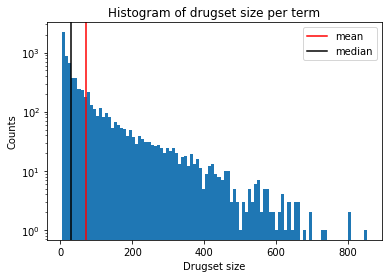

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import figure, text, scatter, show

df_setsize = pd.DataFrame(columns = ['Side_effect','Drugset_size'])
se = []
drugset = []
for k,v in drugsetlibrary.items():
    se.append(k)
    drugset.append(len(set(v)))
df_setsize['Side_effect'] = se
df_setsize['Drugset_size'] = drugset

plt.figure()
plt.hist(df_setsize['Drugset_size'].values, bins=100)
plt.xlabel('Drugset size')
plt.ylabel('Counts')
plt.title('Histogram of drugset size per term')
plt.yscale('log')
plt.axvline(np.mean(df_setsize['Drugset_size']), color='red', label='mean')
plt.axvline(np.median(df_setsize['Drugset_size']), color='black', label='median')
plt.legend()
plt.show()

### Library counts

In [14]:
library_counts(drugsetlibrary)

1435 unique drugs
7137 unique association terms
504739 unique associations
70.72145159030406 average drugs per term


### Exporting the drug-set library in  GMT formats

In [15]:
os.chdir('../../data/PharmGKB')

In [16]:
# Export drugsetlibrary in gmt format
gmt_formatter(drugsetlibrary, 'PharmGKB_OFFSIDES_side_effects_drugsetlibrary.gmt')